<a href="https://colab.research.google.com/github/PyBeginner1/WorldHappinessReport/blob/main/WorldHappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [4]:
data = pd.read_csv('/content/world-happiness-report-2021.csv')

In [5]:
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
data.loc[data['Country name'] == 'India']

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
138,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405


In [8]:
data.select_dtypes('float').columns

Index(['Ladder score', 'Standard error of ladder score', 'upperwhisker',
       'lowerwhisker', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

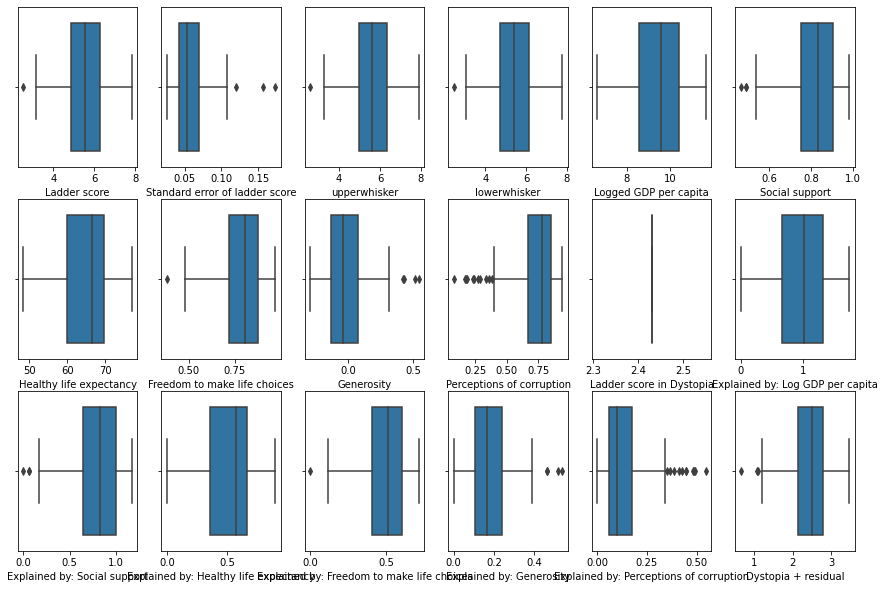

In [9]:
fig, ax = plt.subplots(3, 6, figsize=(15, 10))

numeric_columns = data.select_dtypes('float').columns

for num_cols, axis in zip(numeric_columns, ax.ravel()):   ## ax.ravel() kind of flattens the 2d grid we created, for iteration
  sns.boxplot(x =num_cols, data = data, ax = axis)



In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
world.loc[world['name'] == 'India']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


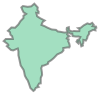

In [12]:
world['geometry'][98]

In [13]:
#checking for misspelled country names with 'world' dataset
country_data = list(data['Country name'].unique())
country_geo = list(world['name'])

country_diff = [country for country in country_data if country not in country_geo]
country_diff

['Czech Republic',
 'United States',
 'Bahrain',
 'Malta',
 'Taiwan Province of China',
 'Singapore',
 'Mauritius',
 'Bosnia and Herzegovina',
 'Dominican Republic',
 'North Cyprus',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Maldives',
 'North Macedonia',
 'Palestinian Territories',
 'Swaziland',
 'Comoros']

In [14]:
#replacing misspelled country names
data['Country name'] = data['Country name'].replace({'United States' : 'United States of America','Taiwan Province of China' : 'Taiwan',
                                                      'Swaziland' : 'Switzerland', 'North Cyprus':'N. Cyprus','Bosnia and Herzegovina':'Bosnia and Herz.',
                                                      'Dominican Republic':'Dominican Rep.'})

# Plotting Happiness level on World Map

In [15]:
def plot_on_world_map(df, col_to_map, title = None):
  #joining the df with world data for plotting
  mapped = world.set_index('name').join(data.set_index('Country name')).reset_index()

  fig,ax = plt.subplots(1, figsize = (20,10))

  mapped.plot(column = col_to_map, cmap = 'Blues', linewidth = 0.8 ,ax = ax, edgecolors = '0.8', legend_kwds = {'shrink' : 0.5}, legend = True)

  ax.set_title(title, fontdict = {'fontsize' : 20})

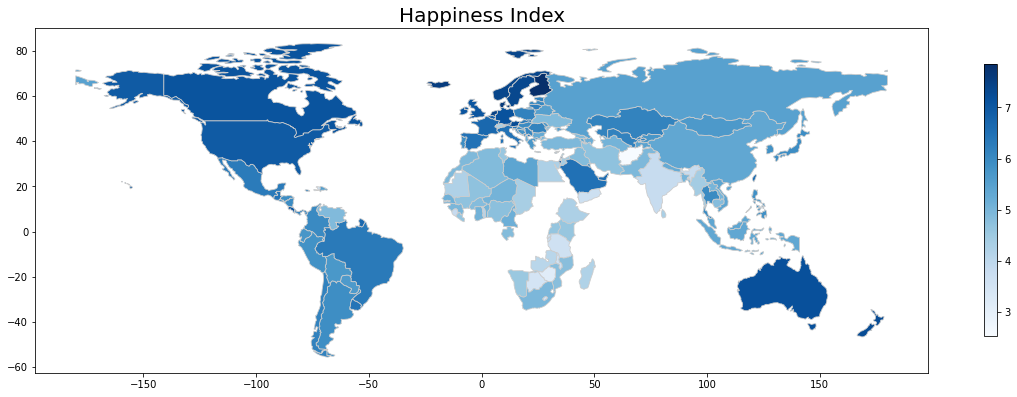

In [16]:
plot_on_world_map(data, 'Ladder score', 'Happiness Index')

**North America & Australia are a happy continent as most of the countries have high happy index value while Africa seems to rate low on Happiness level**

In [17]:
most = data.sort_values('Ladder score')['Country name'].iloc[-1]
least = data.sort_values('Ladder score')['Country name'].iloc[0]

print(f'The most happiest country is {most} & least happiest country is {least}.')

The most happiest country is Finland & least happiest country is Afghanistan.


# Factors influencing Happiness

In [18]:
from sklearn.ensemble import RandomForestRegressor

y = data['Ladder score']

cols_to_consider = ['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                   'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']
X = data[cols_to_consider]


In [19]:
X

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...
144,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,0.457,0.649,0.243,0.359,0.157,0.075,1.205


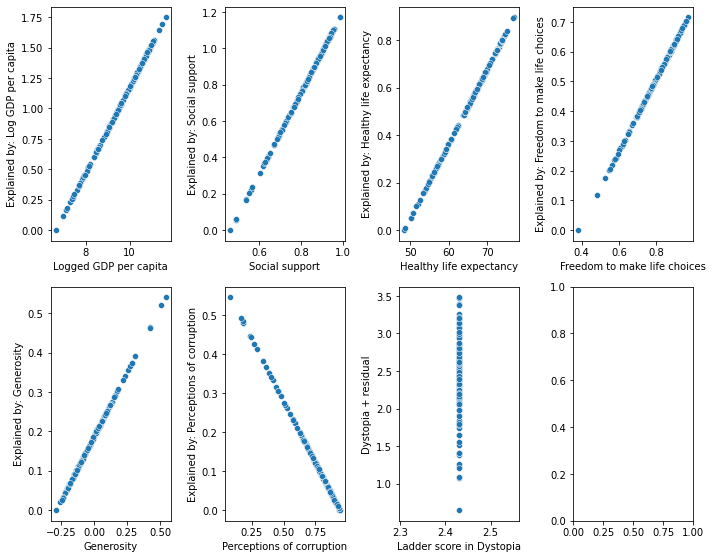

In [20]:
#reason for taking those cols fro above
prior_columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                'Perceptions of corruption', 'Ladder score in Dystopia']

fig, ax = plt.subplots(2, 4, figsize = (10, 8))
for prior_column, col_to_consider, axis in zip(prior_columns, cols_to_consider, ax.ravel()):
  sns.scatterplot(x = prior_column, y = col_to_consider, data =data, ax = axis)

plt.tight_layout()


In [21]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf = 20, min_samples_split = 40)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

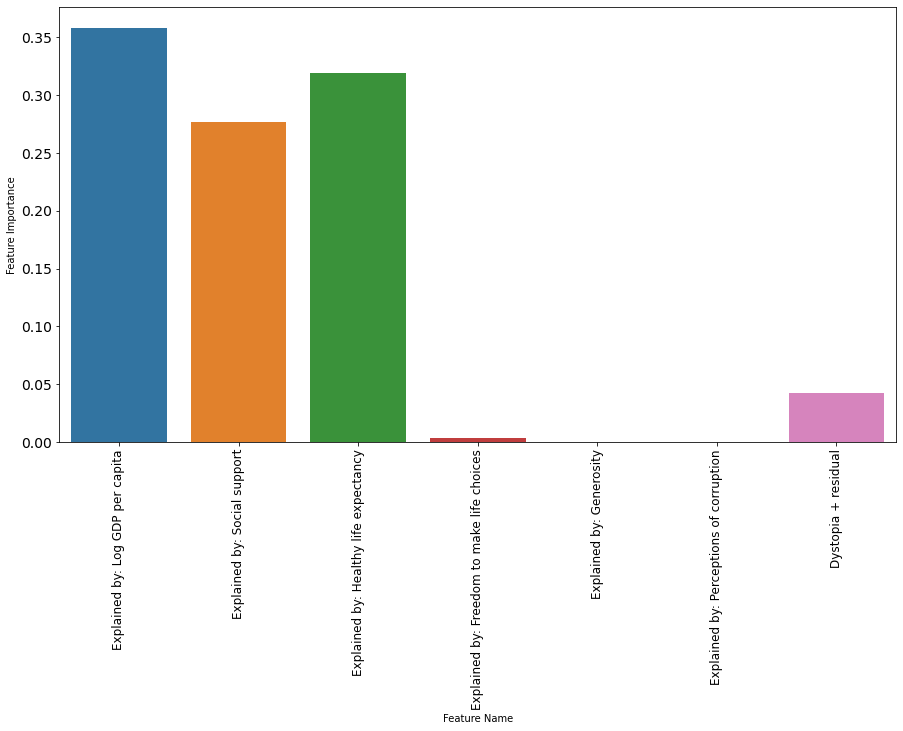

In [22]:
#getting feature impotrance
feature_importances_ = model.feature_importances_
feature_importances = pd.DataFrame({'Feature_name' : cols_to_consider, 'Feature_importance' : feature_importances_})

fig, ax = plt.subplots(1, figsize =(15, 8))
sns.barplot(x = 'Feature_name', y = 'Feature_importance', data = feature_importances, ax = ax)

plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')

plt.xticks(fontsize = 12, rotation = 90)          #giving rotation as words were overlapping
plt.yticks(fontsize = 14)






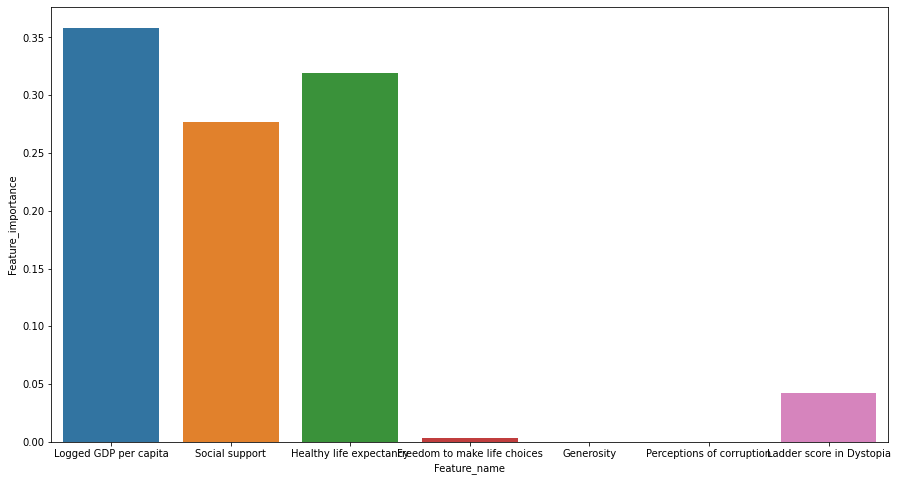

In [23]:
feature_importances_ = model.feature_importances_
feature_importances = pd.DataFrame({'Feature_name' : prior_columns, 'Feature_importance' : feature_importances_})

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'Feature_name', y = 'Feature_importance', data = feature_importances, ax = ax)

From the graph above **Freedom to make life choices**, **Generosity** & **Perceptions of corruption** have little to no importance in count of Happiness

# Happy vs Unhappy Countries

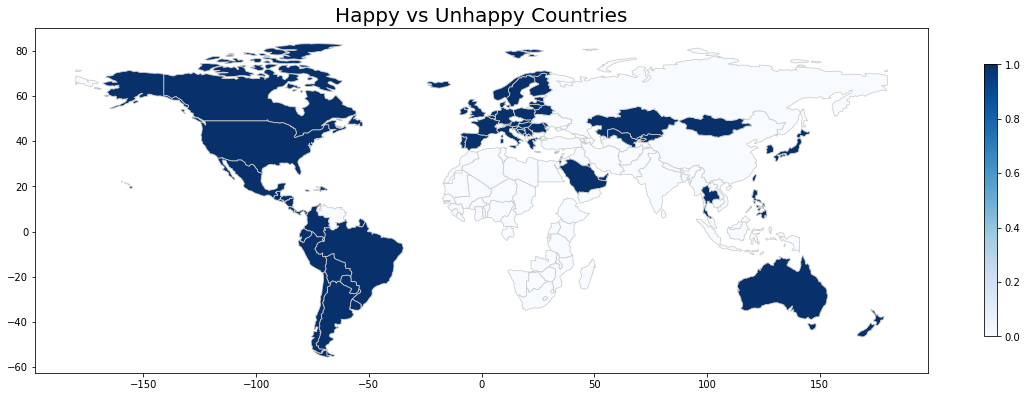

In [24]:
threshold = data['Ladder score'].mean()

data['Happy_Unhappy'] = data['Ladder score'].apply(lambda x: 1 if x > threshold else 0)

plot_on_world_map(data, 'Happy_Unhappy', 'Happy vs Unhappy Countries')



*North & South America, Australia, New Zealand & Europe are very much happy while Asian & African countries are not very happy*


 

# Exploratory Data Analysis using Seaborn

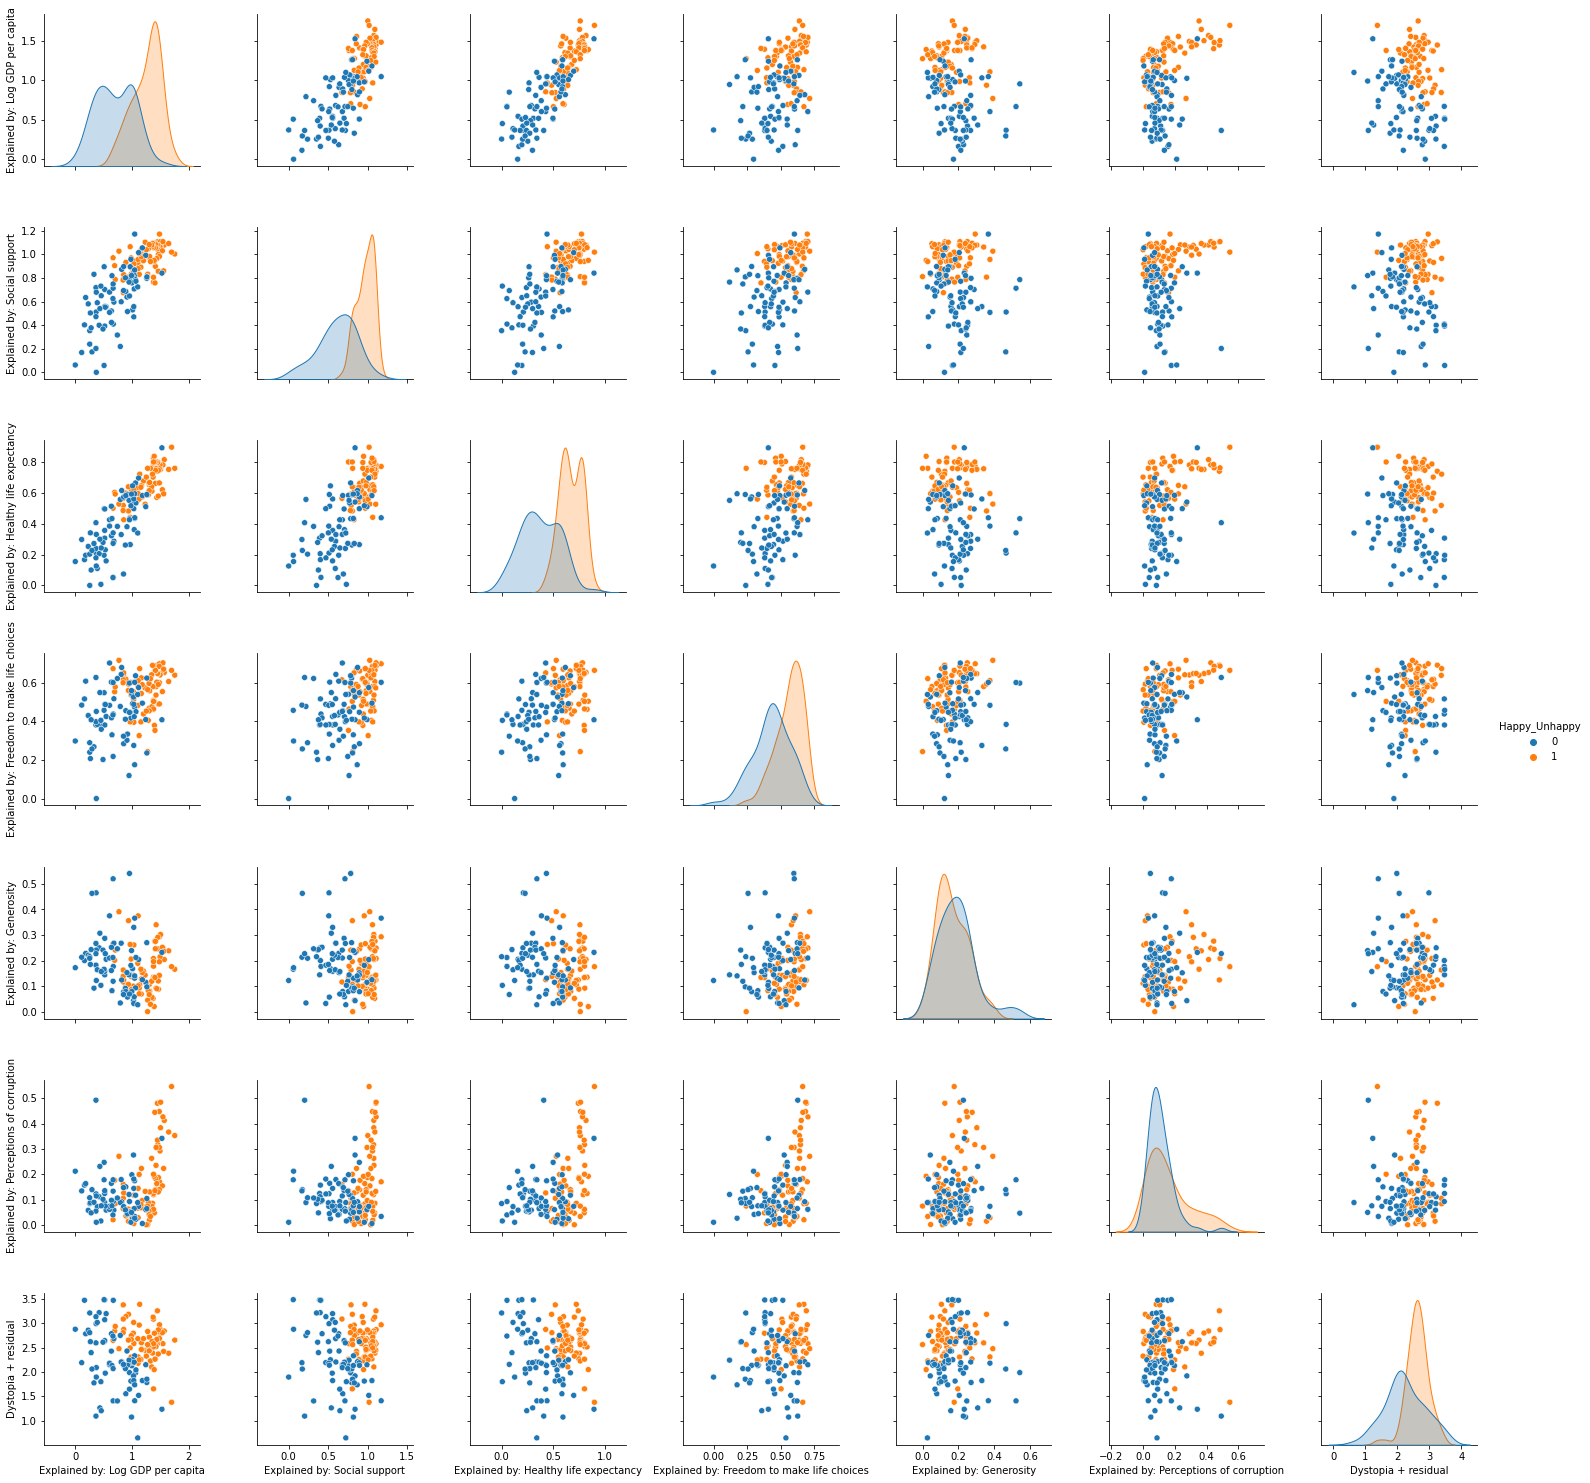

In [25]:
ax = sns.pairplot(x_vars = cols_to_consider, y_vars = cols_to_consider, hue = 'Happy_Unhappy', data = data, height = 3)

Blue => 0(Unhappy)

Orange => 1(Happy)

relplot, regplot & implot are used when both of your variables are numeric 

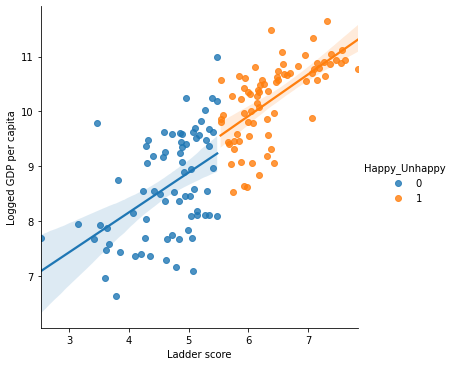

In [26]:
sns.lmplot(x = 'Ladder score', y = 'Logged GDP per capita', hue = 'Happy_Unhappy', data = data )

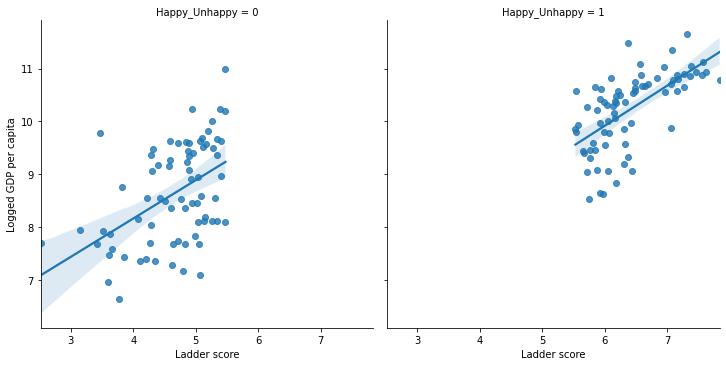

In [27]:
sns.lmplot(x = 'Ladder score', y = 'Logged GDP per capita', col = 'Happy_Unhappy', data = data )

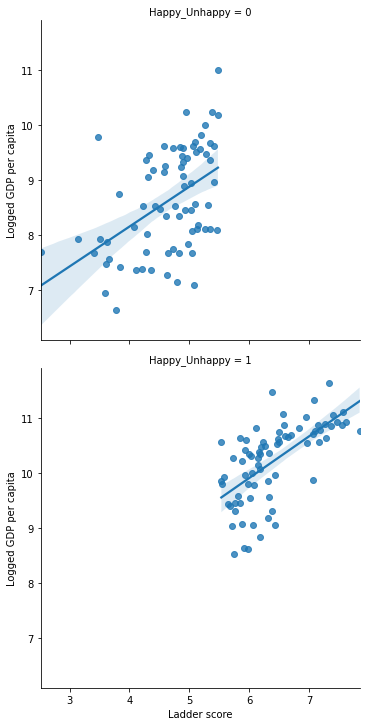

In [28]:
sns.lmplot(x = 'Ladder score', y = 'Logged GDP per capita', row = 'Happy_Unhappy', data = data )

Catplot - Used for 1 numeric & 1 Categorical variable

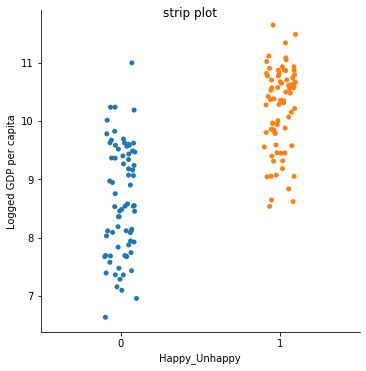

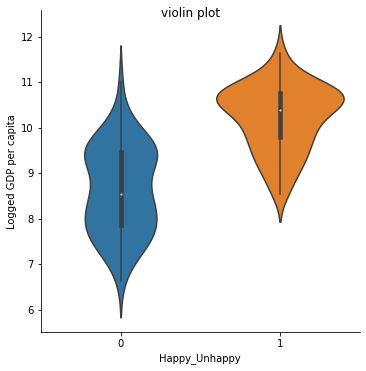

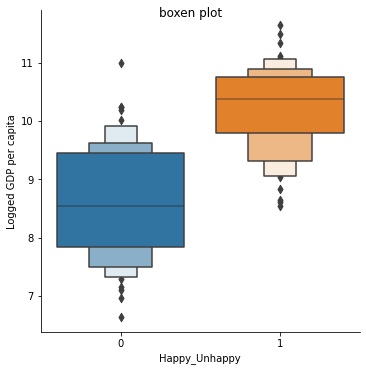

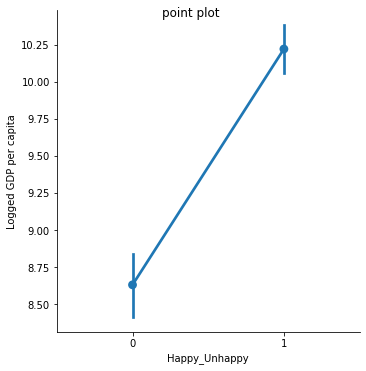

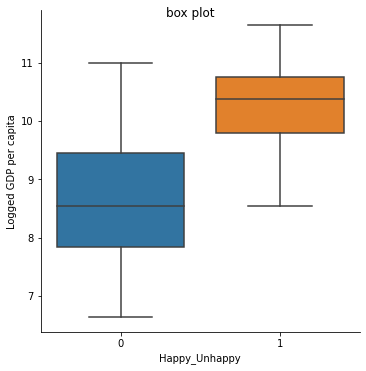

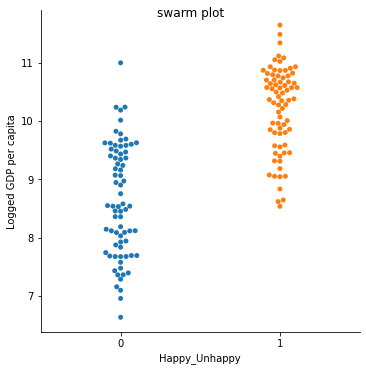

In [29]:
kinds = ['strip', 'violin', 'boxen', 'point', 'box', 'swarm']

for kind in kinds:
  ax = sns.catplot(x= 'Happy_Unhappy', y = 'Logged GDP per capita', data= data, kind = kind)
  ax.fig.suptitle(f'{kind} plot')

# Exploratory Data Analysis using Plotly

In [30]:
import plotly.express as px

**Scatter Plot**

In [31]:
#color operates like hue in seaborn
fig = px.scatter(x = 'Ladder score', y = 'Logged GDP per capita', data_frame= data, color = 'Happy_Unhappy',hover_name = 'Country name')
fig.update_layout(title=dict(text = 'Happiness vs GDP', xanchor = 'center', yanchor = 'top', x = 0.5))
fig.show()

**Sunburst**

In [32]:
continent_country = world[['name', 'continent']]
continent_country

,name,continent
0,Fiji,Oceania
1,Tanzania,Africa
2,W. Sahara,Africa
3,Canada,North America
4,United States of America,North America
...,...,...
172,Serbia,Europe
173,Montenegro,Europe
174,Kosovo,Europe
175,Trinidad and Tobago,North America


In [33]:
#changing the heading
continent_country.columns=['Country name', 'Continent']
continent_country.columns

Index(['Country name', 'Continent'], dtype='object')

In [34]:
continent_country = world[['name', 'continent']]
continent_country.columns = ['Country name', 'Continent']
data = data.merge(continent_country, on = 'Country name')

In [45]:
fig = px.sunburst(data_frame = data, path = ['Continent', 'Country name'], values = 'Ladder score')
fig.update_layout(title=dict(text='Happiness among Countries', yanchor = 'top', x = 0.5))
fig.show()

**Barplot**

In [58]:
df = data.groupby(['Continent', 'Country name']).mean('Logged GDP per capita').reset_index()

fig = px.bar(data_frame = df, x = 'Continent', y = 'Logged GDP per capita', color = 'Happy_Unhappy', hover_name='Country name', color_continuous_scale = 'burg')
fig.update_layout(title=dict(text = 'GDP per capita across Continents', x =0.5))
fig.show()


**Treemap**

In [65]:
df1 = data.groupby(['Continent', 'Country name']).mean(['Healthy life expectancy']).reset_index()

fig = px.treemap(data_frame = df1, path=['Continent', 'Country name'], values = 'Healthy life expectancy')
fig.update_layout(title=dict(text='Health Life Expectancy across Continents', x=0.5))
fig.show()